# Random Data Generation

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [66]:
x_data =  20 * np.random.rand(500,1) - 10
#y_clean = 1+ 0.5*x_data # ?? is this what is meant by "clean?"
y_clean = 1/(1+(np.e)**(-x_data)) #??

In [67]:
y_gaussian = y_clean + np.random.randn(500,1)*0.15
y_gaussian

array([[ 0.31494012],
       [ 0.74210203],
       [ 0.61734181],
       [ 0.78628972],
       [ 0.10549893],
       [ 0.96990296],
       [ 1.07637127],
       [ 1.14648016],
       [ 0.96073524],
       [ 1.00008408],
       [ 1.13127495],
       [ 0.92081836],
       [-0.09159811],
       [ 0.59396932],
       [ 1.07206564],
       [ 0.14678465],
       [ 0.1377557 ],
       [ 0.82916146],
       [ 0.7474927 ],
       [ 0.94742991],
       [-0.0989074 ],
       [ 1.08101261],
       [ 0.86474306],
       [ 1.09063996],
       [ 1.22822183],
       [-0.29708465],
       [-0.16878401],
       [ 0.89362465],
       [-0.15830933],
       [ 0.8332597 ],
       [ 0.90116745],
       [ 0.94382308],
       [ 0.15946215],
       [-0.01625841],
       [ 0.72769025],
       [ 0.12567902],
       [ 0.79209622],
       [ 1.08438786],
       [ 0.99123536],
       [ 0.27731668],
       [ 0.97712169],
       [ 0.52703248],
       [ 0.01214579],
       [-0.0111285 ],
       [ 0.99790492],
       [ 0

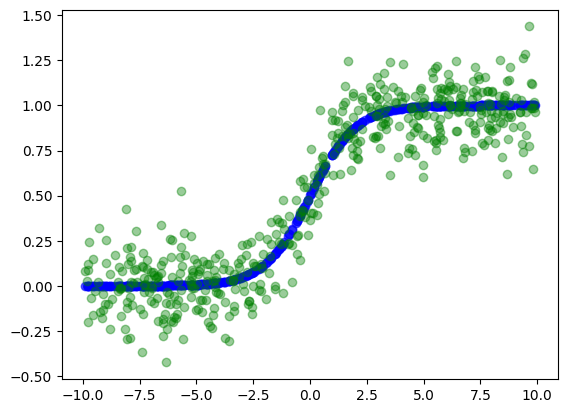

In [68]:
plt.scatter(x_data,y_clean, color="blue", alpha=0.6) 
plt.scatter(x_data, y_gaussian, color="green", alpha=0.4)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [70]:
x_train, x_test, y_clean_train,  y_clean_test, y_gaussian_train, y_gaussian_test = train_test_split(x_data,y_clean,y_gaussian, test_size=100, random_state=42) 

In [71]:
from sklearn.linear_model import LinearRegression
lin_reg_clean = LinearRegression()
lin_reg_noisy = LinearRegression()
lin_reg_clean.fit(x_train, y_clean_train)
lin_reg_noisy.fit(x_train, y_gaussian_train)

LinearRegression()

In [72]:
clean_pred = lin_reg_clean.predict(x_train)
noisy_pred = lin_reg_noisy.predict(x_train)
print(f"Clean: {root_mean_squared_error(y_clean_train, clean_pred)}")
print(f"Noisy: {root_mean_squared_error(y_gaussian_train, noisy_pred)}")

Clean: 0.1481993505448098
Noisy: 0.21002305451223308


In [73]:
clean_pred = lin_reg_clean.predict(x_test)
noisy_pred = lin_reg_noisy.predict(x_test)
error_1 = root_mean_squared_error(y_gaussian_test, noisy_pred)
print(f"Clean: {root_mean_squared_error(y_clean_test, clean_pred)}")
print(f"Noisy: {root_mean_squared_error(y_gaussian_test, noisy_pred)}")

Clean: 0.1588479628418296
Noisy: 0.23236194890283304


In [74]:
x_fit_clean = np.linspace(min(x_test), max(x_test), 100)  # Generate smooth x values
y_fit_clean = lin_reg_clean.coef_[0] * x_fit_clean + lin_reg_clean.intercept_  # Compute corresponding y values
x_fit_noisy = np.linspace(min(x_test), max(x_test), 100)  # Generate smooth x values
y_fit_noisy_1 = lin_reg_noisy.coef_[0] * x_fit_noisy + lin_reg_noisy.intercept_  # Compute corresponding y values

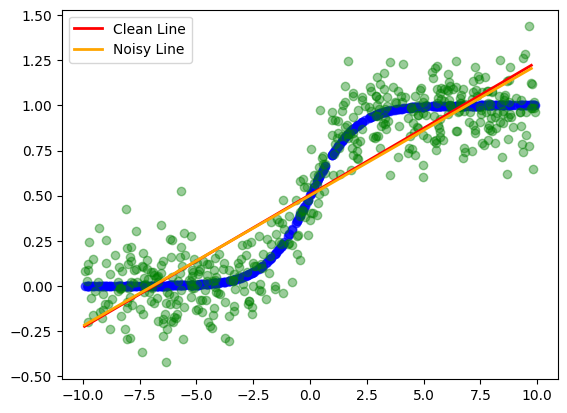

In [75]:
plt.scatter(x_data,y_clean, color="blue", alpha=0.6) 
plt.scatter(x_data, y_gaussian, color="green", alpha=0.4)
plt.plot(x_fit_clean, y_fit_clean, color='red', linewidth=2, label=f"Clean Line")
plt.plot(x_fit_noisy, y_fit_noisy_1, color='orange', linewidth=2, label=f"Noisy Line")
plt.legend()

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
power_2 = PolynomialFeatures(degree=2, include_bias=False)
x_2 = power_2.fit_transform(x_train)
x_2[0]

array([0.36769616, 0.13520047])

In [78]:
lin_reg_clean = LinearRegression()
lin_reg_noisy_2 = LinearRegression()
lin_reg_clean.fit(x_2, y_clean_train)
lin_reg_noisy_2.fit(x_2, y_gaussian_train)

LinearRegression()

In [79]:
clean_pred = lin_reg_clean.predict(x_2)
noisy_pred = lin_reg_noisy_2.predict(x_2)
print(f"Clean: {root_mean_squared_error(y_clean_train, clean_pred)}")
print(f"Noisy: {root_mean_squared_error(y_gaussian_train, noisy_pred)}")

Clean: 0.14738386824331387
Noisy: 0.20928706505317488


In [80]:
x_2_test = power_2.fit_transform(x_test)

clean_pred = lin_reg_clean.predict(x_2_test)        
noisy_pred = lin_reg_noisy_2.predict(x_2_test)
error_2 = root_mean_squared_error(y_gaussian_test, noisy_pred)
print(f"Clean: {root_mean_squared_error(y_clean_test, clean_pred)}")
print(f"Noisy: {root_mean_squared_error(y_gaussian_test, noisy_pred)}")

Clean: 0.15953780315068558
Noisy: 0.23228017854674807


In [81]:
lin_reg_clean.intercept_, lin_reg_clean.coef_

(array([0.52397929]), array([[ 0.07364825, -0.00055488]]))

In [82]:
lin_reg_noisy_2.intercept_, lin_reg_noisy_2.coef_

(array([0.52138629]), array([[ 0.07240701, -0.00062784]]))

In [83]:
y_fit_clean = lin_reg_clean.coef_[0][1] * x_fit_clean**2 + lin_reg_clean.coef_[0][0]*x_fit_clean + lin_reg_clean.intercept_ 
# y = -0.000135(x^2) + 0.0711x + 0.5068
y_fit_noisy_2 = lin_reg_noisy_2.coef_[0][1] * x_fit_clean**2 + lin_reg_noisy_2.coef_[0][0]*x_fit_clean + lin_reg_noisy_2.intercept_ 
# y = -0.00029(x^2) + 0.0727x + 0.5096

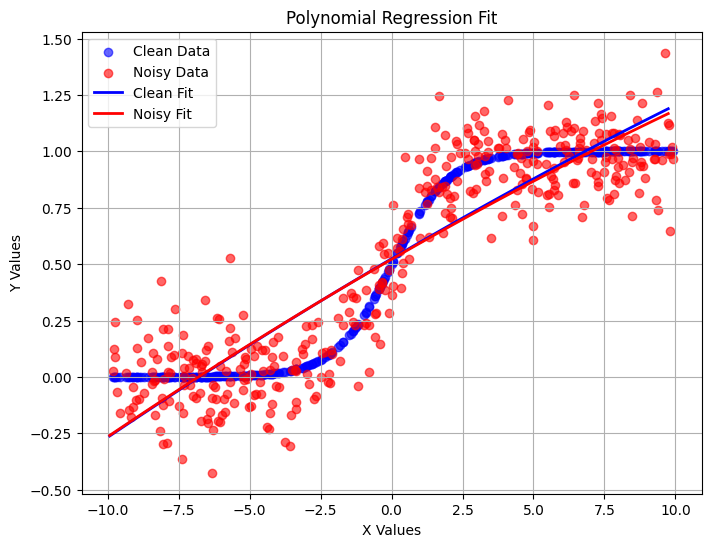

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_clean_train, color='blue', alpha=0.6, label="Clean Data")
plt.scatter(x_train, y_gaussian_train, color='red', alpha=0.6, label="Noisy Data")

# Plot polynomial regression curves
plt.plot(x_fit_clean, y_fit_clean, color='blue', linewidth=2, label="Clean Fit")
plt.plot(x_fit_clean, y_fit_noisy_2, color='red', linewidth=2, label="Noisy Fit")

# Labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [85]:
models = []
for x in [3, 4, 5, 6, 7]:
    model = PolynomialFeatures(degree=x, include_bias=False)
    train_set = model.fit_transform(x_train)
    test_set = model.fit_transform(x_test)
    lin_reg_clean = LinearRegression()
    lin_reg_noisy = LinearRegression()
    lin_reg_clean.fit(train_set, y_clean_train)
    lin_reg_noisy.fit(train_set, y_gaussian_train)
    noisy_pred = lin_reg_noisy.predict(test_set)
    error = root_mean_squared_error(y_gaussian_test, noisy_pred)
    print(f"RMSE for {x}: {error}")
    models.append([lin_reg_clean, lin_reg_noisy, error])


models[3][1].coef_

RMSE for 3: 0.1739175032882136
RMSE for 4: 0.17604306245128756
RMSE for 5: 0.1534327327776962
RMSE for 6: 0.15369156566030268
RMSE for 7: 0.150323880231098


array([[ 1.66549133e-01, -3.69097154e-03, -2.86374623e-03,
         8.05947247e-05,  1.78843294e-05, -4.72514201e-07]])

In [86]:
cubic = models[0][1].coef_[0][2] * x_fit_clean**3 + models[0][1].coef_[0][1]*x_fit_clean**2 + models[0][1].coef_[0][0]*x_fit_clean + models[0][1].intercept_ 
quad = models[1][1].coef_[0][3] * x_fit_clean**4 + models[1][1].coef_[0][2] * x_fit_clean**3 + models[1][1].coef_[0][1]*x_fit_clean**2 + models[1][1].coef_[0][0]*x_fit_clean + models[1][1].intercept_ 
five = models[2][1].coef_[0][4] * x_fit_clean**5 + models[2][1].coef_[0][3] * x_fit_clean**4 + models[2][1].coef_[0][2] * x_fit_clean**3 + models[2][1].coef_[0][1]*x_fit_clean**2 + models[2][1].coef_[0][0]*x_fit_clean + models[2][1].intercept_ 
six = models[3][1].coef_[0][5] * x_fit_clean**6 + models[3][1].coef_[0][4] * x_fit_clean**5 + models[3][1].coef_[0][3] * x_fit_clean**4 + models[3][1].coef_[0][2] * x_fit_clean**3 + models[3][1].coef_[0][1]*x_fit_clean**2 + models[3][1].coef_[0][0]*x_fit_clean + models[3][1].intercept_ 
seven = models[4][1].coef_[0][6] * x_fit_clean**7  + models[4][1].coef_[0][5] * x_fit_clean**6 + models[4][1].coef_[0][4] * x_fit_clean**5 + models[4][1].coef_[0][3] * x_fit_clean**4 + models[4][1].coef_[0][2] * x_fit_clean**3 + models[4][1].coef_[0][1]*x_fit_clean**2 + models[4][1].coef_[0][0]*x_fit_clean + models[4][1].intercept_ 

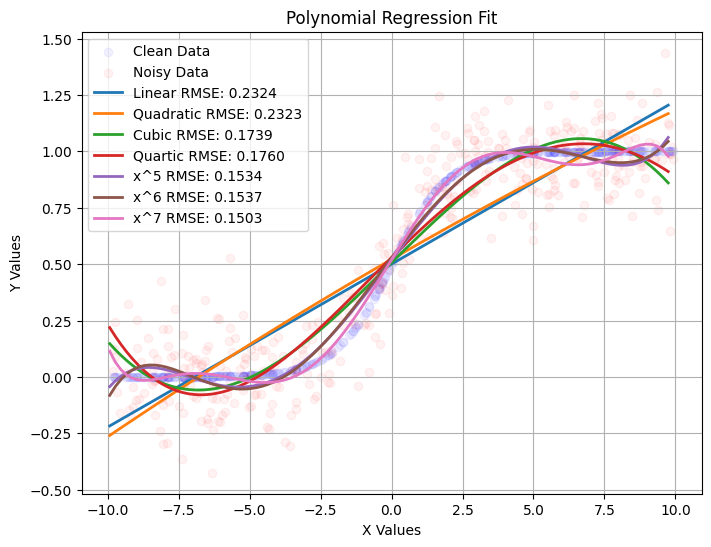

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_clean_train, color='blue', alpha=0.05, label="Clean Data")
plt.scatter(x_train, y_gaussian_train, color='red', alpha=0.05, label="Noisy Data")

# Plot polynomial regression curves
plt.plot(x_fit_clean, y_fit_noisy_1, linewidth=2, label=f"Linear RMSE: {error_1:.4f}")
plt.plot(x_fit_clean, y_fit_noisy_2, linewidth=2, label=f"Quadratic RMSE: {error_2:.4f}")
plt.plot(x_fit_clean, cubic,  linewidth=2, label=f"Cubic RMSE: {models[0][2]:.4f}")
plt.plot(x_fit_clean, quad, linewidth=2, label=f"Quartic RMSE: {models[1][2]:.4f}")
plt.plot(x_fit_clean, five, linewidth=2, label=f"x^5 RMSE: {models[2][2]:.4f}")
plt.plot(x_fit_clean, six, linewidth=2, label=f"x^6 RMSE: {models[3][2]:.4f}")
plt.plot(x_fit_clean, seven, linewidth=2, label=f"x^7 RMSE: {models[4][2]:.4f}")

# Labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [88]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from numpy.random import uniform
from scipy.stats import randint

In [89]:
sgd_pipeline = Pipeline([
        # Bias should be excluded because by default SGDRegressor adds bias via the "fit_intercept" parameter
        ('poly', PolynomialFeatures(include_bias=False)), 
        ('scaler', StandardScaler()),
        ('sgd', SGDRegressor()),
    ])

In [90]:
#for x in [3, 4, 5, 6, 7]:
#model = PolynomialFeatures(degree=, include_bias=False)
train_set = model.fit_transform(x_train)
test_set = model.fit_transform(x_test)
lin_reg_clean = SGDRegressor(max_iter=1000, tol=1e-3)
lin_reg_noisy = SGDRegressor(max_iter=1000, tol=1e-3)
#sgd_pipeline.fit(train_set, y_clean_train.ravel())
sgd_pipeline.fit(x_train, y_gaussian_train.ravel())
noisy_pred = sgd_pipeline.predict(x_test)
error = root_mean_squared_error(y_gaussian_test, noisy_pred)
print(error)
#print(f"RMSE for {x}: {error}")
#models.append([lin_reg_clean, lin_reg_noisy, error])
sgd_pipeline['sgd'].coef_

0.23218117690337817


array([ 0.41895996, -0.01649514])

In [91]:
models = []
param_grid = {#'poly__degree': [1, 2, 3, 4, 5, 6, 7],
              'sgd__alpha': [0.1, 0.01, 0.001, 0.0001], 
              'sgd__tol': [0.0001], # best 
              'sgd__max_iter':[500, 1000,10000],
              'sgd__eta0': [0.0001, 0.00001, 0.000001, 1e-7, 1e-8, 1e-9, 1e-10]}
"""
grid = {
        #'loss': ["hinge", "log_loss",  "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
        'alpha': uniform(low=0.00001, high=0.0001, size=1000),
        'max_iter': randint(low=1000, high=10000),
        'tol': uniform(low=0.0001, high=0.01, size=1000),
        #'power_t': uniform(low=-1, high=1, size=1000),
        #'eta0': uniform(low=0, high=0.1, size=1000)
    }"""

#train_set = model.fit_transform(x_train)
#test_set = model.fit_transform(x_test)

for x in [1, 2, 3, 4, 5, 6, 7]:
    sgd_pipeline = Pipeline([
        # Bias should be excluded because by default SGDRegressor adds bias via the "fit_intercept" parameter
        ('poly', PolynomialFeatures(degree=x, include_bias=False)), 
        ('scaler', StandardScaler()),
        ('sgd', SGDRegressor()),
    ])
    #sgd = GridSearchCV(sgd_pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=1)
    sgd_pipeline.fit(x_train, y_gaussian_train.ravel())
    #random_search = RandomizedSearchCV(lin_reg_noisy, param_distributions=grid, n_iter=30, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
    #best = sgd.best_estimator_
    noisy_pred = sgd_pipeline.predict(x_test)
    error = root_mean_squared_error(y_gaussian_test, noisy_pred)
    print(f"RMSE for {x}: {error}")
    models.append([sgd_pipeline, error])

models

RMSE for 1: 0.23213466691749549
RMSE for 2: 0.23201385265929814
RMSE for 3: 0.22173915341214878
RMSE for 4: 0.22102063425186885
RMSE for 5: 0.20600040476371226
RMSE for 6: 0.20648607229389757
RMSE for 7: 0.2104411190592401


[[Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                  ('scaler', StandardScaler()), ('sgd', SGDRegressor())]),
  0.23213466691749549],
 [Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                  ('scaler', StandardScaler()), ('sgd', SGDRegressor())]),
  0.23201385265929814],
 [Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('scaler', StandardScaler()), ('sgd', SGDRegressor())]),
  0.22173915341214878],
 [Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                  ('scaler', StandardScaler()), ('sgd', SGDRegressor())]),
  0.22102063425186885],
 [Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                  ('scaler', StandardScaler()), ('sgd', SGDRegressor())]),
  0.20600040476371226],
 [Pipeline(steps=[('poly', PolynomialFeatures(degree=6, include_bias=False)),
                  ('scaler', StandardScaler()),

In [92]:
models[1][0]['sgd'].coef_ # array([0.68964152, 0.06972173])


array([ 0.41935097, -0.01829759])

In [93]:
linear = models[0][0]['sgd'].coef_[0] * x_fit_noisy + models[0][0]['sgd'].intercept_
quadratic = models[1][0]['sgd'].coef_[1] * x_fit_clean**2 + models[1][0]['sgd'].coef_[0]*x_fit_clean + models[1][0]['sgd'].intercept_ 
cubic =models[2][0]['sgd'].coef_[2]* x_fit_clean**3 + models[2][0]['sgd'].coef_[1]*x_fit_clean**2 + models[2][0]['sgd'].coef_[0]*x_fit_clean + models[1][0]['sgd'].intercept_ 
quad = models[3][0]['sgd'].coef_[3] * x_fit_clean**4 + models[3][0]['sgd'].coef_[2] * x_fit_clean**3 + models[3][0]['sgd'].coef_[1]*x_fit_clean**2 + models[3][0]['sgd'].coef_[0]*x_fit_clean + models[3][0]['sgd'].intercept_ 
five = models[4][0]['sgd'].coef_[4] * x_fit_clean**5 + models[4][0]['sgd'].coef_[3] * x_fit_clean**4 + models[4][0]['sgd'].coef_[2] * x_fit_clean**3 + models[4][0]['sgd'].coef_[1]*x_fit_clean**2 + models[4][0]['sgd'].coef_[0]*x_fit_clean + models[4][0]['sgd'].intercept_ 
#six = models[3][1].coef_[0][5] * x_fit_clean**6 + models[3][1].coef_[0][4] * x_fit_clean**5 + models[3][1].coef_[0][3] * x_fit_clean**4 + models[3][1].coef_[0][2] * x_fit_clean**3 + models[3][1].coef_[0][1]*x_fit_clean**2 + models[3][1].coef_[0][0]*x_fit_clean + models[3][1].intercept_ 
#seven = models[4][1].coef_[0][6] * x_fit_clean**7  + models[4][1].coef_[0][5] * x_fit_clean**6 + models[4][1].coef_[0][4] * x_fit_clean**5 + models[4][1].coef_[0][3] * x_fit_clean**4 + models[4][1].coef_[0][2] * x_fit_clean**3 + models[4][1].coef_[0][1]*x_fit_clean**2 + models[4][1].coef_[0][0]*x_fit_clean + models[4][1].intercept_ 

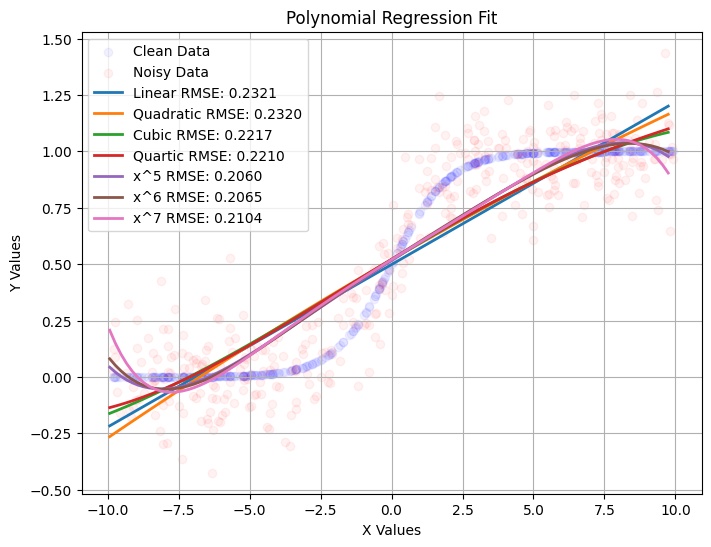

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_clean_train, color='blue', alpha=0.05, label="Clean Data")
plt.scatter(x_train, y_gaussian_train, color='red', alpha=0.05, label="Noisy Data")

# Plot polynomial regression curves
plt.plot(x_fit_noisy, models[0][0].predict(x_fit_noisy), linewidth=2, label=f"Linear RMSE: {models[0][1]:.4f}")
plt.plot(x_fit_noisy, models[1][0].predict(x_fit_noisy), linewidth=2, label=f"Quadratic RMSE: {models[1][1]:.4f}")
plt.plot(x_fit_noisy, models[2][0].predict(x_fit_noisy),  linewidth=2, label=f"Cubic RMSE: {models[2][1]:.4f}")
plt.plot(x_fit_noisy, models[3][0].predict(x_fit_noisy), linewidth=2, label=f"Quartic RMSE: {models[3][1]:.4f}")
plt.plot(x_fit_noisy, models[4][0].predict(x_fit_noisy), linewidth=2, label=f"x^5 RMSE: {models[4][1]:.4f}")
plt.plot(x_fit_noisy, models[5][0].predict(x_fit_noisy), linewidth=2, label=f"x^6 RMSE: {models[5][1]:.4f}")
plt.plot(x_fit_noisy, models[6][0].predict(x_fit_noisy), linewidth=2, label=f"x^7 RMSE: {models[6][1]:.4f}")

# Labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Regularization

In [95]:
from sklearn.linear_model import Ridge

In [96]:
ridge_reg_clean = Ridge(alpha=1, solver="cholesky")
ridge_reg_noisy = Ridge(alpha=1, solver="cholesky")
ridge_reg_clean.fit(x_train, y_clean_train)
ridge_reg_noisy.fit(x_train, y_gaussian_train)
clean_pred = ridge_reg_clean.predict(x_test)
noisy_pred = ridge_reg_noisy.predict(x_test)
print(f"Clean: {root_mean_squared_error(y_clean_test, clean_pred)}")
print(f"Noisy: {root_mean_squared_error(y_gaussian_test, noisy_pred)}")

Clean: 0.15884866749744958
Noisy: 0.23236221928602097


In [97]:
models = []
""""
param_grid = {#'poly__degree': [1, 2, 3, 4, 5, 6, 7],
              '__alpha': [0.1, 0.01, 0.001, 0.0001], 
              'sgd__tol': [0.0001], # best 
              'sgd__max_iter':[500, 1000,10000],
              'sgd__eta0': [0.0001, 0.00001, 0.000001, 1e-7, 1e-8, 1e-9, 1e-10]}
"""
#sgd = GridSearchCV(ridge_pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=1)

#train_set = model.fit_transform(x_train)
#test_set = model.fit_transform(x_test)

for x in [1, 2, 3, 4, 5, 6, 7]:
    ridge_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=x)), 
        #('scaler', StandardScaler()),
        ('ridge', Ridge()),
    ])
    ridge_pipeline.fit(x_train, y_gaussian_train.ravel())
    #random_search = RandomizedSearchCV(lin_reg_noisy, param_distributions=grid, n_iter=30, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
    noisy_pred = ridge_pipeline.predict(x_test)
    error = root_mean_squared_error(y_gaussian_test, noisy_pred)
    print(f"RMSE for {x}: {error}")
    models.append([ridge_pipeline, error])

models

RMSE for 1: 0.23236221928602097
RMSE for 2: 0.23228055663437844
RMSE for 3: 0.173930096644751
RMSE for 4: 0.17605404948723444
RMSE for 5: 0.15348577648505365
RMSE for 6: 0.15373928753820681
RMSE for 7: 0.15035023249083831


[[Pipeline(steps=[('poly', PolynomialFeatures(degree=1)), ('ridge', Ridge())]),
  0.23236221928602097],
 [Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())]),
  0.23228055663437844],
 [Pipeline(steps=[('poly', PolynomialFeatures(degree=3)), ('ridge', Ridge())]),
  0.173930096644751],
 [Pipeline(steps=[('poly', PolynomialFeatures(degree=4)), ('ridge', Ridge())]),
  0.17605404948723444],
 [Pipeline(steps=[('poly', PolynomialFeatures(degree=5)), ('ridge', Ridge())]),
  0.15348577648505365],
 [Pipeline(steps=[('poly', PolynomialFeatures(degree=6)), ('ridge', Ridge())]),
  0.15373928753820681],
 [Pipeline(steps=[('poly', PolynomialFeatures(degree=7)), ('ridge', Ridge())]),
  0.15035023249083831]]

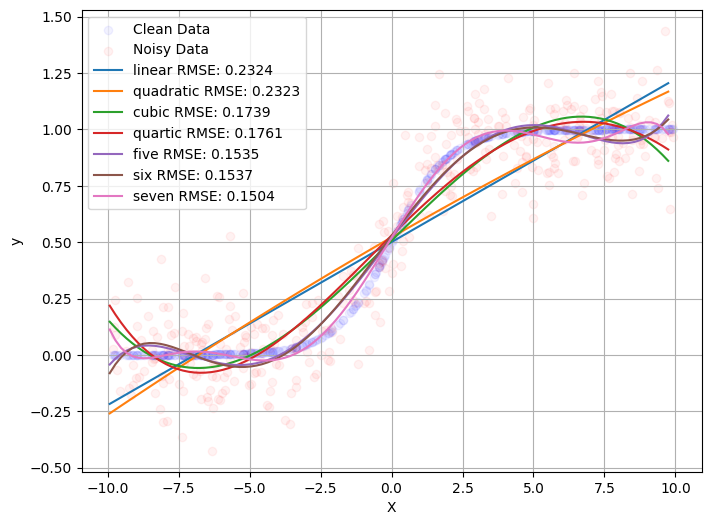

In [98]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_clean_train, color='blue', alpha=0.05, label="Clean Data")
plt.scatter(x_train, y_gaussian_train, color='red', alpha=0.05, label="Noisy Data")

plt.plot(x_fit_noisy, models[0][0].predict(x_fit_noisy), label=f'linear RMSE: {models[0][1]:.4f}')
plt.plot(x_fit_noisy, models[1][0].predict(x_fit_noisy), label=f'quadratic RMSE: {models[1][1]:.4f}')
plt.plot(x_fit_noisy, models[2][0].predict(x_fit_noisy), label=f'cubic RMSE: {models[2][1]:.4f}')
plt.plot(x_fit_noisy, models[3][0].predict(x_fit_noisy), label=f'quartic RMSE: {models[3][1]:.4f}')
plt.plot(x_fit_noisy, models[4][0].predict(x_fit_noisy), label=f'five RMSE: {models[4][1]:.4f}')
plt.plot(x_fit_noisy, models[5][0].predict(x_fit_noisy), label=f'six RMSE: {models[5][1]:.4f}')
plt.plot(x_fit_noisy, models[6][0].predict(x_fit_noisy), label=f'seven RMSE: {models[6][1]:.4f}')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Lasso Regularization

In [99]:
from sklearn.linear_model import Lasso
import warnings
from sklearn.exceptions import ConvergenceWarning

In [100]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [101]:
lasso_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=x, include_bias=False)), 
        #('scaler', StandardScaler()),
        ('lasso', Lasso()),
    ])
lasso_pipeline.fit(x_train, y_gaussian_train)

print(np.count_nonzero(lasso_pipeline["lasso"].coef_ == 0))

2


In [102]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    i = 20
    while i < len(X_train):
        model.fit(X_train[:i], y_train[:i])
        y_train_predict = model.predict(X_train[:i])
        y_val_predict = model.predict(X_val)
        train_errors.append(root_mean_squared_error(y_train[:i], y_train_predict))
        val_errors.append(root_mean_squared_error(y_val, y_val_predict))
        i += 20
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE')
    plt.xticks(np.arange(0,20, step=1), labels=[str(i*20) for i in np.arange(0,20, step=1)])

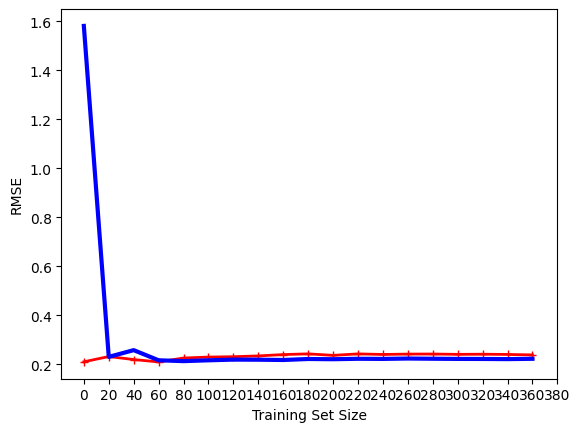

In [103]:
plot_learning_curves(lasso_pipeline, x_data, y_gaussian)

In [104]:
param_grid = {#'poly__degree': [1, 2, 3, 4, 5, 6, 7],
              'lasso__alpha': [1e-10, 1e-15, 1e-20, 1e-25, 1e-30], 
              'lasso__tol': [1, 0.1, 1e-2, 1e-3], 
              'lasso__max_iter':[400, 500, 600, 1000],
              #'sgd__eta0': [0.0001, 0.00001, 0.000001, 1e-7, 1e-8, 1e-9, 1e-10]
              }


lasso_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=20, include_bias=False)), 
        #('scaler', StandardScaler()),
        ('lasso', Lasso()),
    ])

lasso = GridSearchCV(lasso_pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=1)
lasso.fit(x_train, y_gaussian_train)
lasso.best_params_

Fitting 3 folds for each of 80 candidates, totalling 240 fits


{'lasso__alpha': 1e-20, 'lasso__max_iter': 1000, 'lasso__tol': 0.01}

In [105]:
lasso.best_estimator_["lasso"].coef_ # none equal to 0, just very small

array([ 1.79029466e-01, -4.63706403e-03, -3.86027239e-03,  1.18866569e-04,
        3.15166944e-05, -6.30633529e-07,  5.81548078e-08, -4.34561931e-09,
       -5.00885902e-10, -5.27938022e-12, -5.34954289e-12,  1.22970519e-13,
       -2.85032135e-14,  1.49979042e-15, -6.41081366e-17,  1.12523598e-17,
        5.49884962e-19,  5.75903576e-20,  8.17808066e-21,  5.02447611e-23])

In [106]:
models = pd.DataFrame(lasso.cv_results_)
models.sort_values("rank_test_score")[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,param_lasso__max_iter,param_lasso__tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
63,0.005249,0.007423,0.000669,0.000946,1.000000e-25,1000,0.001,"{'lasso__alpha': 1e-25, 'lasso__max_iter': 100...",-0.158588,-0.160191,-0.14463,-0.15447,0.006988,1
62,0.005216,0.007376,0.000000,0.000000,1.000000e-25,1000,0.010,"{'lasso__alpha': 1e-25, 'lasso__max_iter': 100...",-0.158588,-0.160191,-0.14463,-0.15447,0.006988,1
46,0.000669,0.000947,0.003214,0.004545,1.000000e-20,1000,0.010,"{'lasso__alpha': 1e-20, 'lasso__max_iter': 100...",-0.158588,-0.160191,-0.14463,-0.15447,0.006988,1
47,0.000697,0.000985,0.000000,0.000000,1.000000e-20,1000,0.001,"{'lasso__alpha': 1e-20, 'lasso__max_iter': 100...",-0.158588,-0.160191,-0.14463,-0.15447,0.006988,1
78,0.000000,0.000000,0.005223,0.007387,1.000000e-30,1000,0.010,"{'lasso__alpha': 1e-30, 'lasso__max_iter': 100...",-0.158588,-0.160191,-0.14463,-0.15447,0.006988,1


In [107]:
rmse = models.sort_values("rank_test_score")["mean_test_score"].iloc[0]

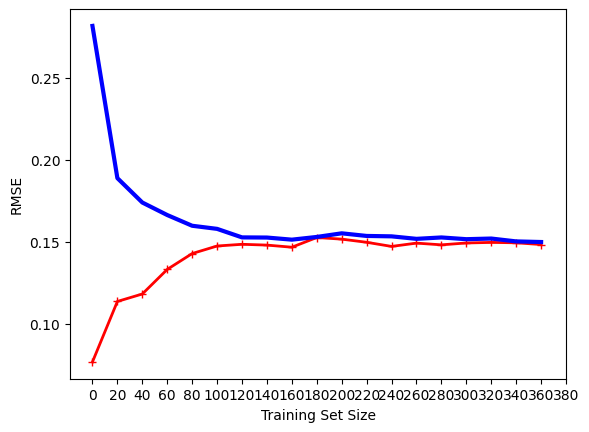

In [108]:
plot_learning_curves(lasso.best_estimator_, x_data, y_gaussian)

In [109]:
lasso.best_estimator_["lasso"].coef_

array([ 1.85070802e-01, -5.14237236e-03, -4.04047768e-03,  1.38830663e-04,
        3.46291795e-05, -5.57490439e-07,  4.44473737e-08, -5.41399416e-09,
       -7.56426575e-10, -3.19370376e-11, -7.18858280e-12, -1.31340136e-13,
       -3.48066703e-14,  2.79648359e-16,  1.94898766e-18,  1.59487041e-17,
        2.50687860e-18,  2.58658424e-19,  4.04180833e-20,  3.24835627e-21])

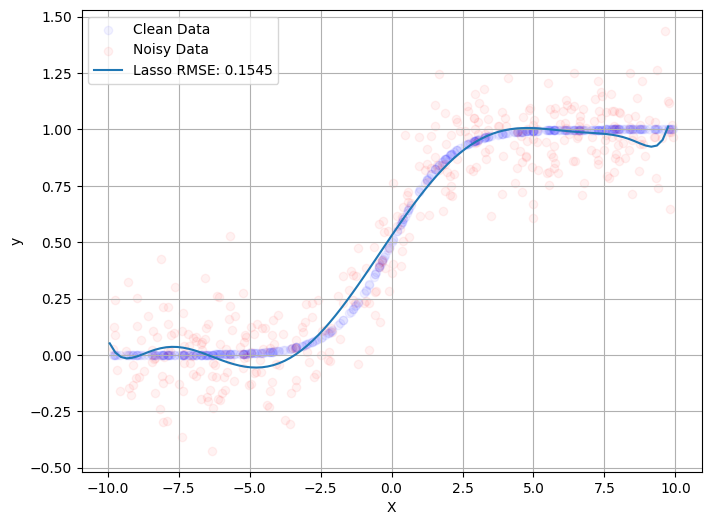

In [110]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_clean_train, color='blue', alpha=0.05, label="Clean Data")
plt.scatter(x_train, y_gaussian_train, color='red', alpha=0.05, label="Noisy Data")

predict = lasso.best_estimator_.predict(x_fit_noisy)
plt.plot(x_fit_noisy, predict, label=f'Lasso RMSE: {abs(rmse):.4f}')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Other Regressions

### SVR

In [111]:
from sklearn.svm import SVR

In [112]:
svm_poly_reg = SVR(kernel="poly", degree=1, C=100, tol=1e-3, epsilon=0.1)
svm_poly_reg.fit(x_train, y_gaussian_train.ravel())

SVR(C=100, degree=1, kernel='poly')

In [113]:
models = []
for x in [1, 2, 3, 4, 5, 6, 8]:
    svm_poly_reg = Pipeline([ 
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel="poly", degree=x, C=100, tol=1e-3, epsilon=0.1, coef0=1)),
    ])
    #svm_poly_reg = SVR(kernel="poly", degree=x, C=100, tol=1e-3, epsilon=0.1)
    svm_poly_reg.fit(x_train, y_gaussian_train.ravel())
    y_pred = svm_poly_reg.predict(x_test)
    rmse = root_mean_squared_error(y_gaussian_test, y_pred)
    print(f"RMSE for {x}: {rmse}")
    models.append([svm_poly_reg, rmse])

models

RMSE for 1: 0.23179844094729368
RMSE for 2: 0.23244961622821658
RMSE for 3: 0.1734940359920844
RMSE for 4: 0.1760617335852169
RMSE for 5: 0.15442139758719026
RMSE for 6: 0.15406857610201088
RMSE for 8: 0.17630296826389413


[[Pipeline(steps=[('scaler', StandardScaler()),
                  ('svr', SVR(C=100, coef0=1, degree=1, kernel='poly'))]),
  0.23179844094729368],
 [Pipeline(steps=[('scaler', StandardScaler()),
                  ('svr', SVR(C=100, coef0=1, degree=2, kernel='poly'))]),
  0.23244961622821658],
 [Pipeline(steps=[('scaler', StandardScaler()),
                  ('svr', SVR(C=100, coef0=1, kernel='poly'))]),
  0.1734940359920844],
 [Pipeline(steps=[('scaler', StandardScaler()),
                  ('svr', SVR(C=100, coef0=1, degree=4, kernel='poly'))]),
  0.1760617335852169],
 [Pipeline(steps=[('scaler', StandardScaler()),
                  ('svr', SVR(C=100, coef0=1, degree=5, kernel='poly'))]),
  0.15442139758719026],
 [Pipeline(steps=[('scaler', StandardScaler()),
                  ('svr', SVR(C=100, coef0=1, degree=6, kernel='poly'))]),
  0.15406857610201088],
 [Pipeline(steps=[('scaler', StandardScaler()),
                  ('svr', SVR(C=100, coef0=1, degree=8, kernel='poly'))]),
  0.176

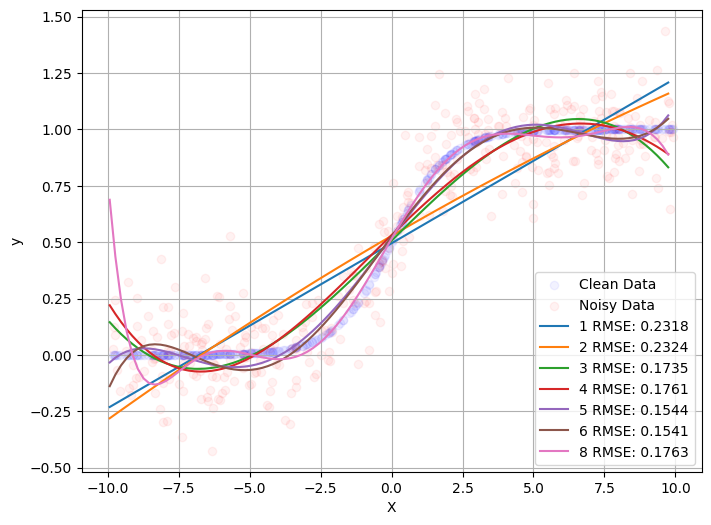

In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_clean_train, color='blue', alpha=0.05, label="Clean Data")
plt.scatter(x_train, y_gaussian_train, color='red', alpha=0.05, label="Noisy Data")

plt.plot(x_fit_noisy, models[0][0].predict(x_fit_noisy), label=f'1 RMSE: {models[0][1]:.4f}')
plt.plot(x_fit_noisy, models[1][0].predict(x_fit_noisy), label=f'2 RMSE: {models[1][1]:.4f}')
plt.plot(x_fit_noisy, models[2][0].predict(x_fit_noisy), label=f'3 RMSE: {models[2][1]:.4f}')
plt.plot(x_fit_noisy, models[3][0].predict(x_fit_noisy), label=f'4 RMSE: {models[3][1]:.4f}')
plt.plot(x_fit_noisy, models[4][0].predict(x_fit_noisy), label=f'5 RMSE: {models[4][1]:.4f}')
plt.plot(x_fit_noisy, models[5][0].predict(x_fit_noisy), label=f'6 RMSE: {models[5][1]:.4f}')
plt.plot(x_fit_noisy, models[6][0].predict(x_fit_noisy), label=f'8 RMSE: {models[6][1]:.4f}')
#plt.plot(x_fit_noisy, models[7][0].predict(x_fit_noisy), label=f'10 RMSE: {models[7][1]:.4f}')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
param_grid = {
              'svr__coef0': [1], 
              'svr__C': [300, 350], 
              'svr__tol':[1e-4, 1e-5],
              'svr__epsilon': [0.1]
              }


svm_poly_reg = Pipeline([ 
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel="poly", degree=5)),
    ])
    #svm_poly_reg = SVR(kernel="poly", degree=x, C=100, tol=1e-3, epsilon=0.1)


poly_reg = GridSearchCV(svm_poly_reg, param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=2)
poly_reg.fit(x_train, y_gaussian_train.ravel())

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END svr__C=250, svr__coef0=1, svr__epsilon=0.1, svr__tol=0.0001; total time=   2.1s
[CV] END svr__C=250, svr__coef0=1, svr__epsilon=0.1, svr__tol=0.0001; total time=   3.3s
[CV] END svr__C=250, svr__coef0=1, svr__epsilon=0.1, svr__tol=0.0001; total time=   1.8s
[CV] END svr__C=250, svr__coef0=1, svr__epsilon=0.1, svr__tol=1e-05; total time=   5.6s
[CV] END svr__C=250, svr__coef0=1, svr__epsilon=0.1, svr__tol=1e-05; total time=   3.1s
[CV] END svr__C=250, svr__coef0=1, svr__epsilon=0.1, svr__tol=1e-05; total time=   1.9s
[CV] END svr__C=300, svr__coef0=1, svr__epsilon=0.1, svr__tol=0.0001; total time=   2.9s
[CV] END svr__C=300, svr__coef0=1, svr__epsilon=0.1, svr__tol=0.0001; total time=   2.7s
[CV] END svr__C=300, svr__coef0=1, svr__epsilon=0.1, svr__tol=0.0001; total time=   3.5s
[CV] END svr__C=300, svr__coef0=1, svr__epsilon=0.1, svr__tol=1e-05; total time=   2.9s
[CV] END svr__C=300, svr__coef0=1, svr__epsilon=0.1, s

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR(degree=5, kernel='poly'))]),
             param_grid={'svr__C': [250, 300, 350], 'svr__coef0': [1],
                         'svr__epsilon': [0.1], 'svr__tol': [0.0001, 1e-05]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [116]:
models = pd.DataFrame(poly_reg.cv_results_)
models.sort_values("rank_test_score")[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__coef0,param_svr__epsilon,param_svr__tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,3.647871,1.518482,0.000667,0.000471,250,1,0.1,0.00001,"{'svr__C': 250, 'svr__coef0': 1, 'svr__epsilon...",-0.163476,-0.160285,-0.143737,-0.155833,0.008651,1
3,3.745928,0.724693,0.001011,0.001430,300,1,0.1,0.00001,"{'svr__C': 300, 'svr__coef0': 1, 'svr__epsilon...",-0.163587,-0.160259,-0.143782,-0.155876,0.008659,2
2,3.140711,0.369854,0.002321,0.002445,300,1,0.1,0.00010,"{'svr__C': 300, 'svr__coef0': 1, 'svr__epsilon...",-0.163600,-0.160271,-0.143783,-0.155885,0.008665,3
0,2.511154,0.642223,0.000000,0.000000,250,1,0.1,0.00010,"{'svr__C': 250, 'svr__coef0': 1, 'svr__epsilon...",-0.163692,-0.160296,-0.143734,-0.155908,0.008719,4
5,7.001844,1.980264,0.000168,0.000238,350,1,0.1,0.00001,"{'svr__C': 350, 'svr__coef0': 1, 'svr__epsilon...",-0.163677,-0.160241,-0.143875,-0.155931,0.008639,5


In [117]:
y_pred = poly_reg.best_estimator_.predict(x_test)
rmse = root_mean_squared_error(y_gaussian_test, y_pred)
rmse

0.15391576971811222

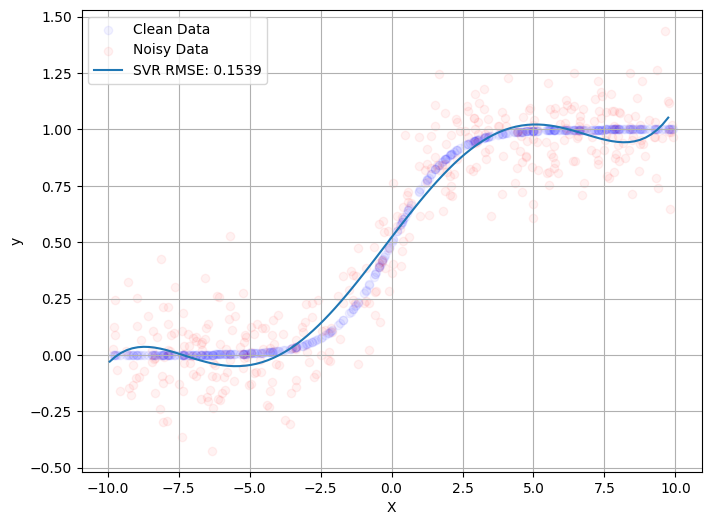

In [118]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_clean_train, color='blue', alpha=0.05, label="Clean Data")
plt.scatter(x_train, y_gaussian_train, color='red', alpha=0.05, label="Noisy Data")

plt.plot(x_fit_noisy, poly_reg.best_estimator_.predict(x_fit_noisy), label=f'SVR RMSE: {rmse:.4f}')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

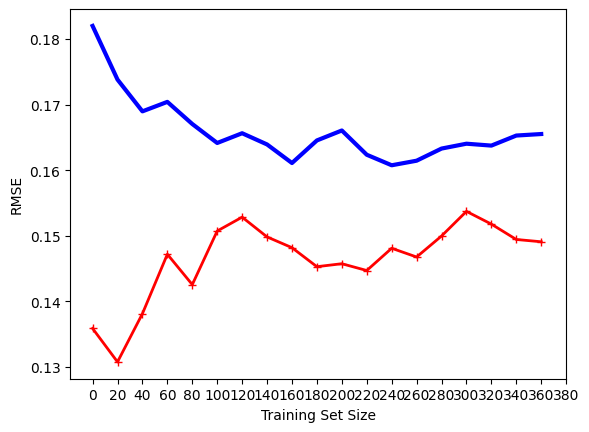

In [119]:
plot_learning_curves(poly_reg.best_estimator_, x_data, y_gaussian.ravel())

### Decision Trees

In [120]:
from sklearn.tree import DecisionTreeRegressor

In [121]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x_train, y_gaussian_train)
y_pred_tree = tree_reg.predict(x_test)
rmse = root_mean_squared_error(y_gaussian_test, y_pred_tree)

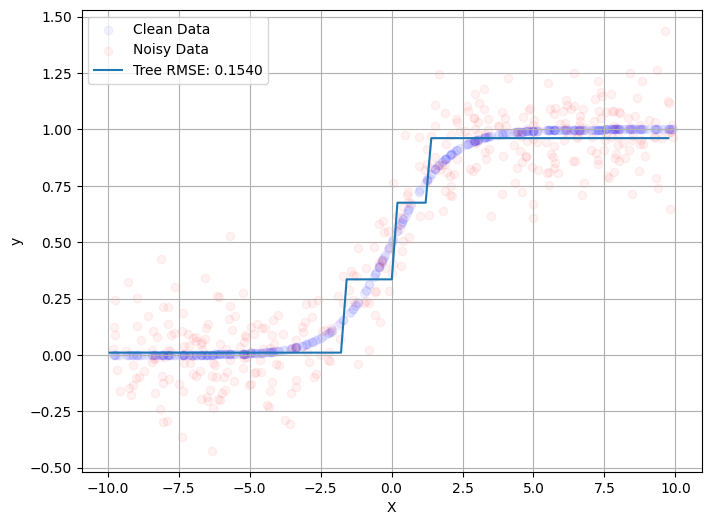

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_clean_train, color='blue', alpha=0.05, label="Clean Data")
plt.scatter(x_train, y_gaussian_train, color='red', alpha=0.05, label="Noisy Data")

plt.plot(x_fit_noisy, tree_reg.predict(x_fit_noisy), label=f'Tree RMSE: {rmse:.4f}')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
models = []
for x in [2, 4, 6, 8]:
    tree_reg = Pipeline([ 
        ('scaler', StandardScaler()),
        ('tree', DecisionTreeRegressor(max_depth=x)),
    ])
    #svm_poly_reg = SVR(kernel="poly", degree=x, C=100, tol=1e-3, epsilon=0.1)
    tree_reg.fit(x_train, y_gaussian_train.ravel())
    y_pred = tree_reg.predict(x_test)
    rmse = root_mean_squared_error(y_gaussian_test, y_pred)
    print(f"RMSE for {x}: {rmse}")
    models.append([tree_reg, rmse])

models

RMSE for 2: 0.15403958468016643
RMSE for 4: 0.15116672054194047
RMSE for 6: 0.17145615397956918
RMSE for 8: 0.2028689777694663


[[Pipeline(steps=[('scaler', StandardScaler()),
                  ('tree', DecisionTreeRegressor(max_depth=2))]),
  0.15403958468016643],
 [Pipeline(steps=[('scaler', StandardScaler()),
                  ('tree', DecisionTreeRegressor(max_depth=4))]),
  0.15116672054194047],
 [Pipeline(steps=[('scaler', StandardScaler()),
                  ('tree', DecisionTreeRegressor(max_depth=6))]),
  0.17145615397956918],
 [Pipeline(steps=[('scaler', StandardScaler()),
                  ('tree', DecisionTreeRegressor(max_depth=8))]),
  0.2028689777694663]]

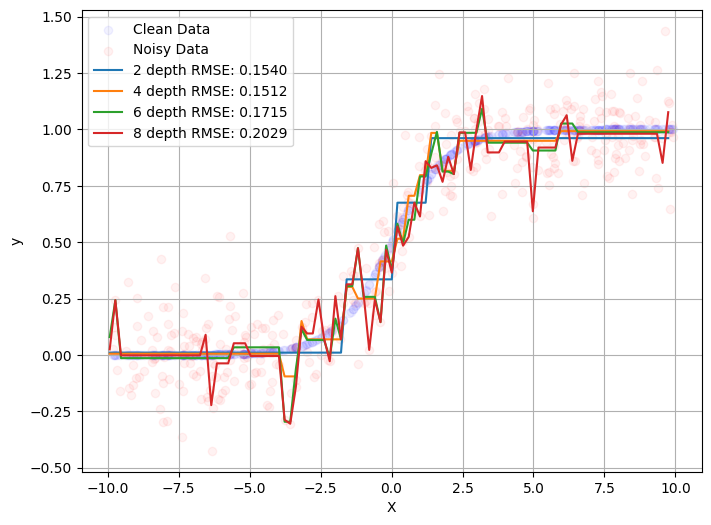

In [124]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_clean_train, color='blue', alpha=0.05, label="Clean Data")
plt.scatter(x_train, y_gaussian_train, color='red', alpha=0.05, label="Noisy Data")

plt.plot(x_fit_noisy, models[0][0].predict(x_fit_noisy), label=f'2 depth RMSE: {models[0][1]:.4f}')
plt.plot(x_fit_noisy, models[1][0].predict(x_fit_noisy), label=f'4 depth RMSE: {models[1][1]:.4f}')
plt.plot(x_fit_noisy, models[2][0].predict(x_fit_noisy), label=f'6 depth RMSE: {models[2][1]:.4f}')
plt.plot(x_fit_noisy, models[3][0].predict(x_fit_noisy), label=f'8 depth RMSE: {models[3][1]:.4f}')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
param_grid = {
              'tree__max_depth': [2,3,4,5], 
              'tree__min_samples_leaf': [5,6,7,8,9], 
              'tree__max_leaf_nodes':[None, 10000],
              'tree__min_samples_split': [2,5,10,]
              }


pipeline = Pipeline([ 
        ('scaler', StandardScaler()),
        ('tree', DecisionTreeRegressor()),
    ])

tree_reg = GridSearchCV(pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=1)
tree_reg.fit(x_train, y_gaussian_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('tree', DecisionTreeRegressor())]),
             param_grid={'tree__max_depth': [2, 3, 4, 5],
                         'tree__max_leaf_nodes': [None, 10000],
                         'tree__min_samples_leaf': [5, 6, 7, 8, 9],
                         'tree__min_samples_split': [2, 5, 10]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [126]:
models = pd.DataFrame(tree_reg.cv_results_)
models.sort_values("rank_test_score")[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree__max_depth,param_tree__max_leaf_nodes,param_tree__min_samples_leaf,param_tree__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,0.000644,0.000588,0.00132,0.002177,3,None,5,2,"{'tree__max_depth': 3, 'tree__max_leaf_nodes':...",-0.136768,-0.163764,-0.142818,-0.138649,-0.154018,-0.147203,0.010218,1
31,0.000000,0.000000,0.00000,0.000000,3,None,5,5,"{'tree__max_depth': 3, 'tree__max_leaf_nodes':...",-0.136768,-0.163764,-0.142818,-0.138649,-0.154018,-0.147203,0.010218,1
45,0.000667,0.000559,0.00040,0.000490,3,10000,5,2,"{'tree__max_depth': 3, 'tree__max_leaf_nodes':...",-0.136768,-0.163764,-0.142818,-0.138649,-0.154018,-0.147203,0.010218,1
47,0.000000,0.000000,0.00000,0.000000,3,10000,5,10,"{'tree__max_depth': 3, 'tree__max_leaf_nodes':...",-0.136768,-0.163764,-0.142818,-0.138649,-0.154018,-0.147203,0.010218,1
35,0.000939,0.000485,0.00071,0.001000,3,None,6,10,"{'tree__max_depth': 3, 'tree__max_leaf_nodes':...",-0.136768,-0.163764,-0.142818,-0.138649,-0.154018,-0.147203,0.010218,1


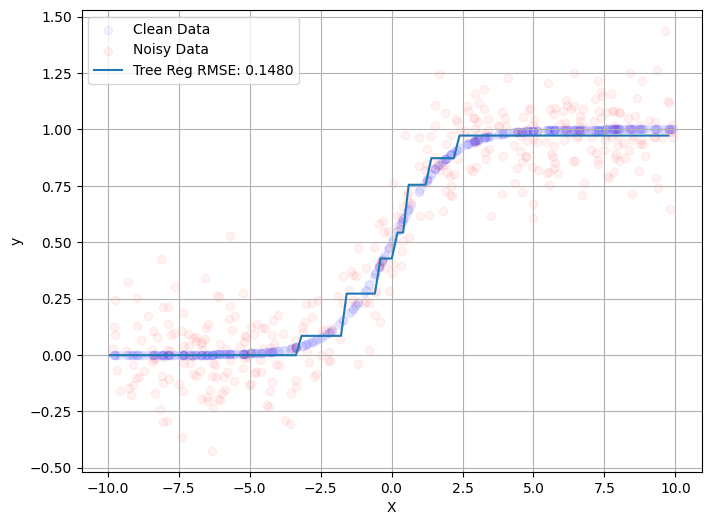

In [127]:
y_pred = tree_reg.best_estimator_.predict(x_test)
rmse = root_mean_squared_error(y_gaussian_test, y_pred)
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_clean_train, color='blue', alpha=0.05, label="Clean Data")
plt.scatter(x_train, y_gaussian_train, color='red', alpha=0.05, label="Noisy Data")

plt.plot(x_fit_noisy, tree_reg.best_estimator_.predict(x_fit_noisy), label=f'Tree Reg RMSE: {rmse:.4f}')


plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

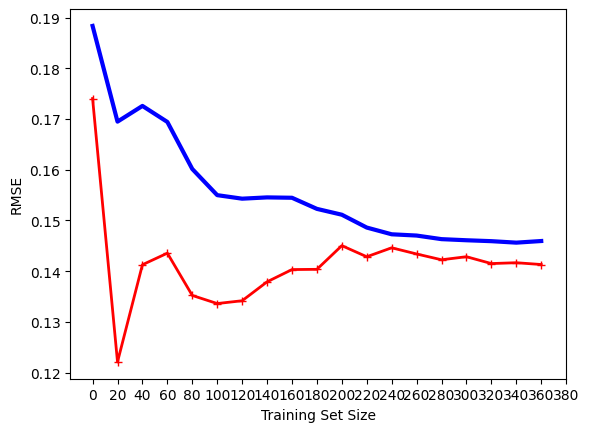

In [128]:
plot_learning_curves(tree_reg.best_estimator_, x_data, y_gaussian)

# Analysis

In order of RMSE:
Polynomial x^7 = 0.1486 ????
Lasso = 0.1489
Tree Reg = 0.1612
Ridge = 0.1625
SVR = 0.1659
SGD = 0.1746
Linear = 0.2087